> ### EEE3314: Introduction to Artificial Intelligence

# Assignment \# I: Linear Regression

### *Assignement Instructions:*
- **Due date**: 11 PM, Sep. 24 (Fri), 2021
- **File name**: [ID_Name_HW1.ipynb]
- Write a program implementing a particular algorithm to solve a given problem.   
- **Report and discuss your results. Analyze the algorithm, theoretically and empirically.**

### *Collaboration policy:*
- You may discuss the questions with your friends, but each student writes their own codes and answers.  
- **Cheating is strictly prohibited, and will be considered academic dishonesty. This is not how you want to start your career as an engineer.**
>We expect that most students can distinguish between helping other students and cheating. Explaining the meaning of a question or discussing a way of approaching a solution is an interaction. But you should write your homework solution strictly by yourself so that your hands and eyes can help you internalize the subject matter. You should acknowledge everyone whom you have worked with, or who has given you any significant ideas about the homework
- Signiture: <span style="color:blue">[2016142212] [김성훈]</span>

In [33]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2021-09-19 14:42:38.226470


In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Problem statement

Let's estimate a house price with 506 training samples in $\texttt{boston-house-prices.csv}$. Each sample consists of a tuple of features and a corresponding house price, where the number of features are 13.  


Detailed descriptions of features in the training dataset are as follows: 



* **CRIM**     :per capita crime rate by town
* **ZN**       :proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS**    :proportion of non-retail business acres per town
* **CHAS**     :Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **NOX**      :nitric oxides concentration (parts per 10 million)
* **RM**       :average number of rooms per dwelling
* **AGE**      :proportion of owner-occupied units built prior to 1940
* **DIS**      :weighted distances to five Boston employment centres
* **RAD**      :index of accessibility to radial highways
* **TAX**      :full-value property-tax rate per $\$$10,000
* **PTRATIO**  :pupil-teacher ratio by town
* **B**        :1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT**    :$\%$ lower status of the population


The target price value we'd like to estimate is as follows: 

* **MEDV** :Median value of owner-occupied homes in $\$$1000's

**Note #1**:
You can use ```linalg.inv```, ```transpose```, ```dot```, ```concatenate```, ```min``` and ```max``` provided by ```Numpy```. Other mehtods (e.g., ```sklearn.linear_model``` or equivalent) should not be used. You will get no credit otherwise. 

**Note #2**: We apply the min-max normalization technique for each feature in the dataset. Please ckeck the provided function (`normalize(self)`). For eaxmple, the nomrlization for the **CRIM** feature is computed as follows:


$x[i]^\prime = \frac{x[i] - min(x[:])}{max(x[:]) - min(x[:])}$

where $x[i]$ is the **CRIM** fearue in the $i$th sample in the dataset. $x[i]^\prime$ is a corresponding normalized feature.

**Why is the normalized technique helpful for regression?**

### P1. Linear regression using gradient descent

P1.1 Implement a linear regression method using **gradient descent** and estimate regression coefficients for features including a bias (intercept) term. (*50 points*) 

> **Convergence condition**: Stop the iteration if $||\hat w_t - \hat w_{t+1}||_\infty < \tau$, where $\hat w_t$  is estimated coefficients at time $t$. $t$ is a number of iteration, and $\tau (=10^{-6})$ is a tolerance. Note that the infinity norm of a vector ${\bf{x}}=(x_1,x_2,\dots,x_n)$ is defined as $||{\bf{x}}||_\infty = max(|x_1|,|x_2|,\dots,|x_n|)$.
>
> **Loss function**: Average RSS (i.e., RSS/$N$, where $N$ is a total number of samples).
>
> **Initialization**: All weight values to 0 and a bias (intercept) to 1.

P1.2 Plot an average RSS loss over the number of iterations. (*3 points*) 


P1.3 Predict the target value (`MEDV`) for a given test sample (`test_samples`). Note that 1) you first normalize each feature in the test sample using minimum and maximum values for the same feature, computed from the training dataset ($\texttt{boston-house-prices.csv}$), and then 2) denormalize the prediction in a similar manner. **Why does we apply normalization (with the values computed from the training dataset) and demormalization?** (*7 points*)



### P2. Linear regression without iterations

Implement a linear regression method without iterations (**closed-form solution**) and estimate regression coefficients for features including a bias (intercept) term. (*10 points*)

### P3. Visualize the results

Draw regression lines for individual features using estimated regression coefficients obtained from P1 and P2. (*10points*) 

## Results

In [35]:
import numpy as np

from project1 import (Dataset,
                      LinearRegressor,
                      LR_with_closed_form,
                      visualize)

### Instantiate the ```Dataset``` class

In [36]:
data_path = 'boston_house_prices.csv'
dataset = Dataset(data_path)

features = dataset.features

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


### Prepare training samples

In [37]:
X, y = dataset.parse_data(features=dataset.features)
print(f"shape of X: {X.shape}, shape of y: {y.shape}")

shape of X: (506, 14), shape of y: (506,)


In [38]:
X[3,:]

array([1.00000000e+00, 2.92795719e-04, 0.00000000e+00, 6.30498534e-02,
       0.00000000e+00, 1.50205761e-01, 6.58555279e-01, 4.41812564e-01,
       4.48544590e-01, 8.69565217e-02, 6.67938931e-02, 6.48936170e-01,
       9.94276060e-01, 3.33885210e-02])

In [39]:
dataset.max

array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  ,  50.    ])

### Instantiate a linear regression model

### P1.1

In [195]:
model = LinearRegressor(lr=0.1, tau=1e-6, dim=X.shape[1])

In [196]:
model.LR_with_gradient_descent(X, y)
print(model.weight)

[ 0.47916498 -0.21285646  0.10298457  0.01258599  0.05971707 -0.19149223
  0.44284223  0.00148523 -0.35983325  0.15617494 -0.14351231 -0.19884558
  0.08229539 -0.42219508]


### P1.2

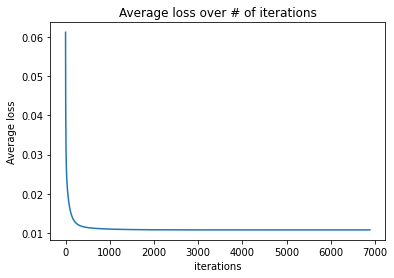

In [197]:
model.plot_loss_history()

### P1.3

In [198]:
test_samples = np.array([0.02, 80, 1.75, 0, 0.385, 6.2, 31.5, 9.1, 1, 241, 18.2, 341.6, 13])

prediction = model.calculate_house_price(test_samples, dataset.min, dataset.max)
print(f"prediction: {prediction}")

prediction: 19.937692876382208


### P2

In [199]:
weight_closed_form = LR_with_closed_form(X, y)
print(weight_closed_form)

[ 0.48045039 -0.21355017  0.10315657  0.0124631   0.0597052  -0.1918794
  0.4418597   0.00149367 -0.36059247  0.15642529 -0.14362949 -0.19901831
  0.08206283 -0.42260541]


In [204]:
print(abs(model.weight - weight_closed_form))

[1.28541129e-03 6.93708228e-04 1.72006323e-04 1.22890736e-04
 1.18741896e-05 3.87174761e-04 9.82534103e-04 8.43949012e-06
 7.59216688e-04 2.50350793e-04 1.17182159e-04 1.72734219e-04
 2.32555079e-04 4.10328862e-04]


### P3

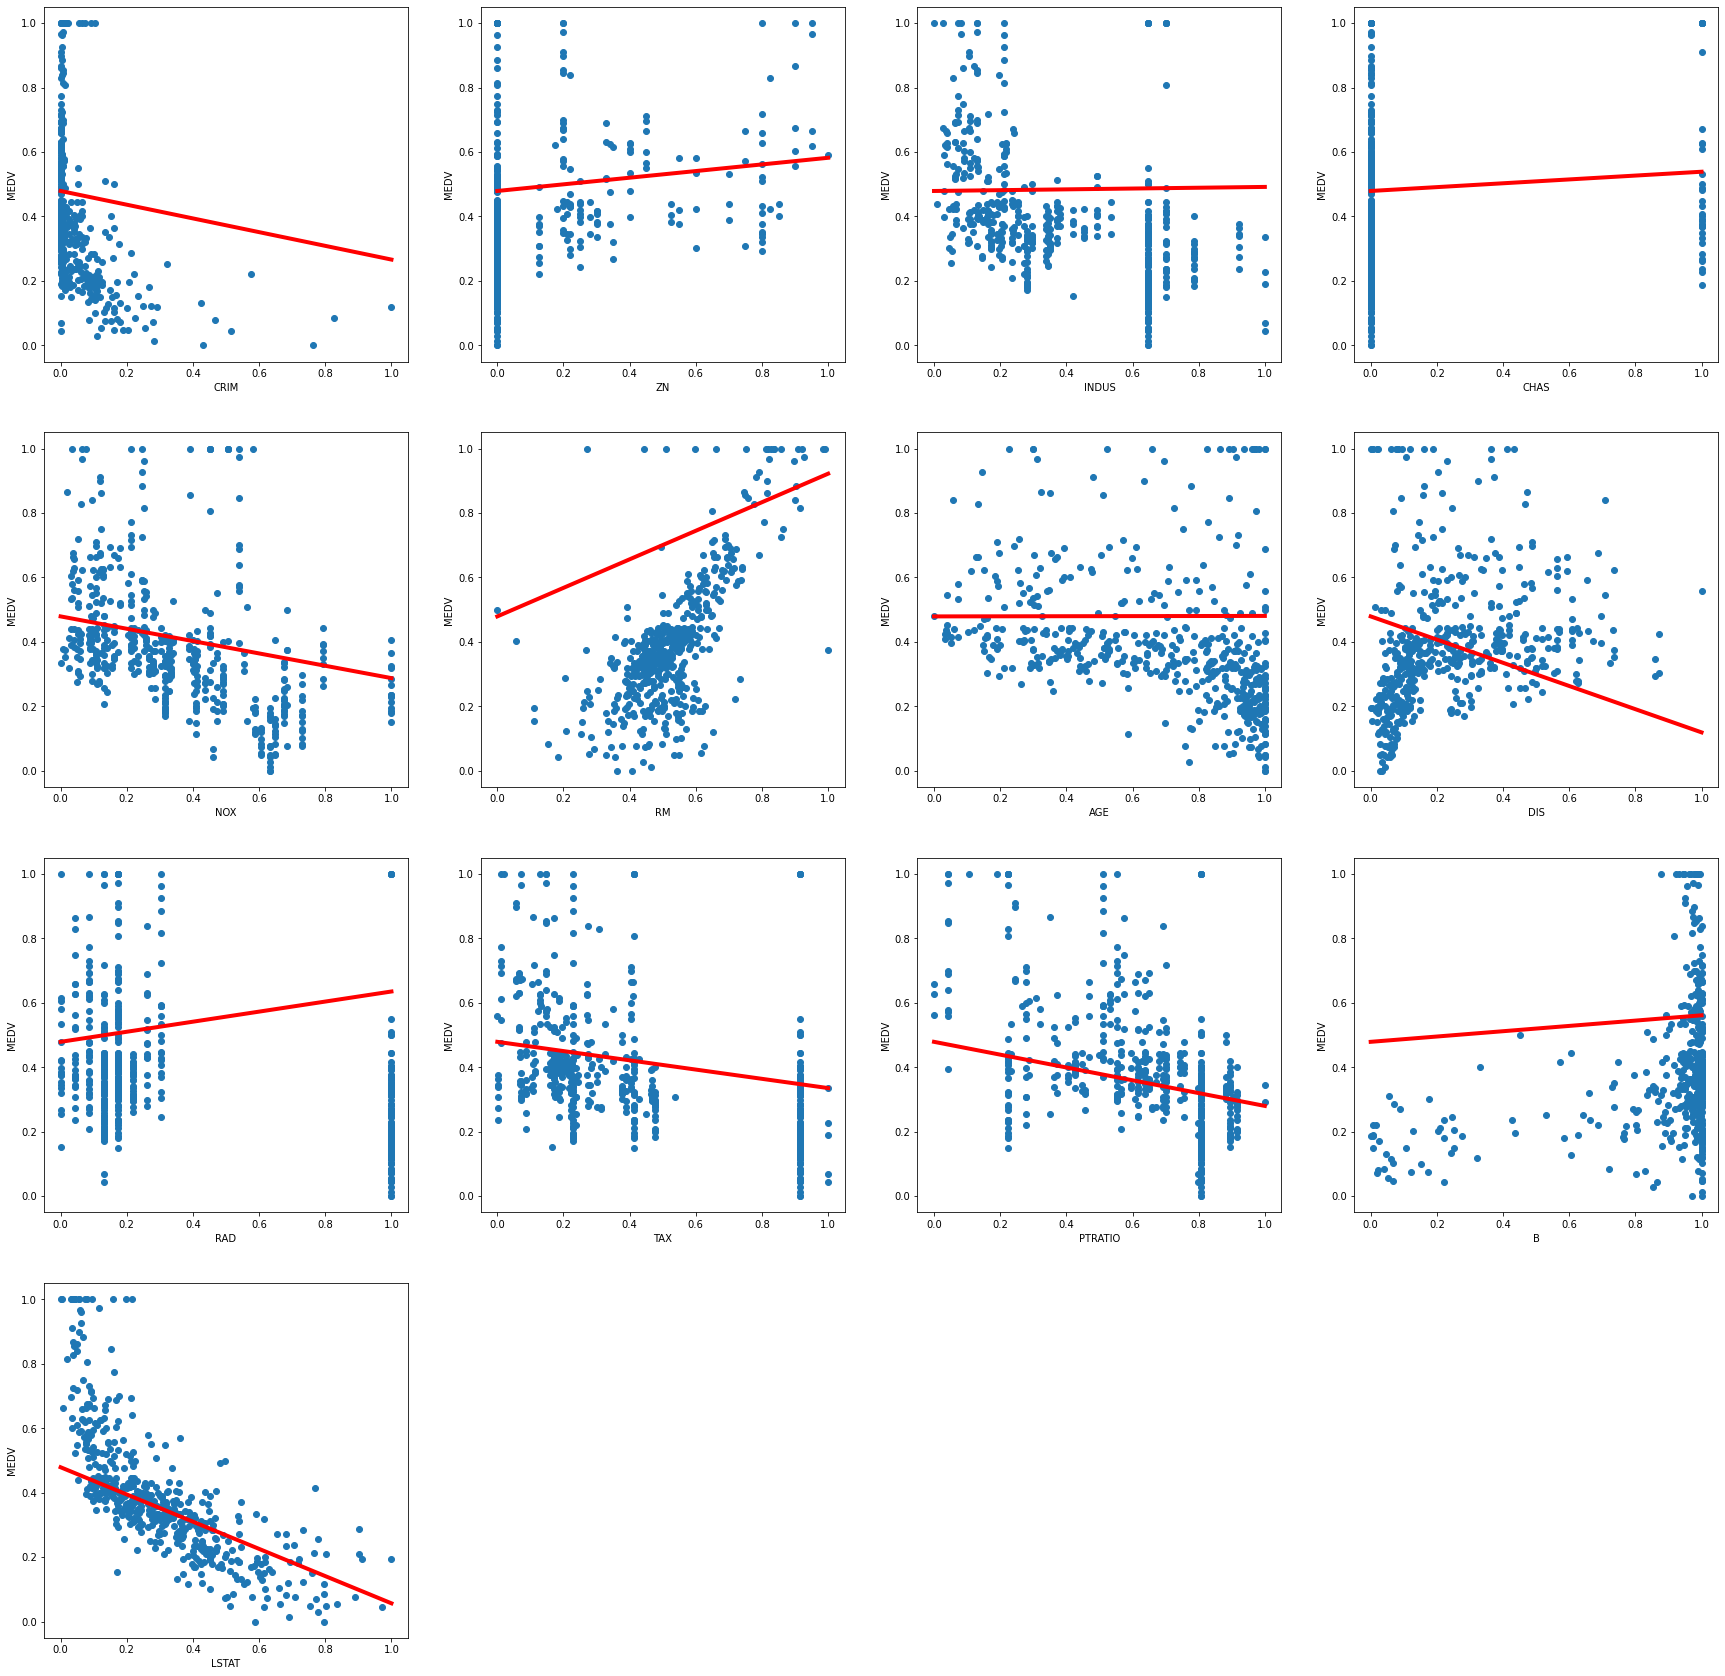

[ 0.47916498 -0.21285646  0.10298457  0.01258599  0.05971707 -0.19149223
  0.44284223  0.00148523 -0.35983325  0.15617494 -0.14351231 -0.19884558
  0.08229539 -0.42219508]


In [201]:
visualize(model.weight, X, y, features)
print(model.weight)

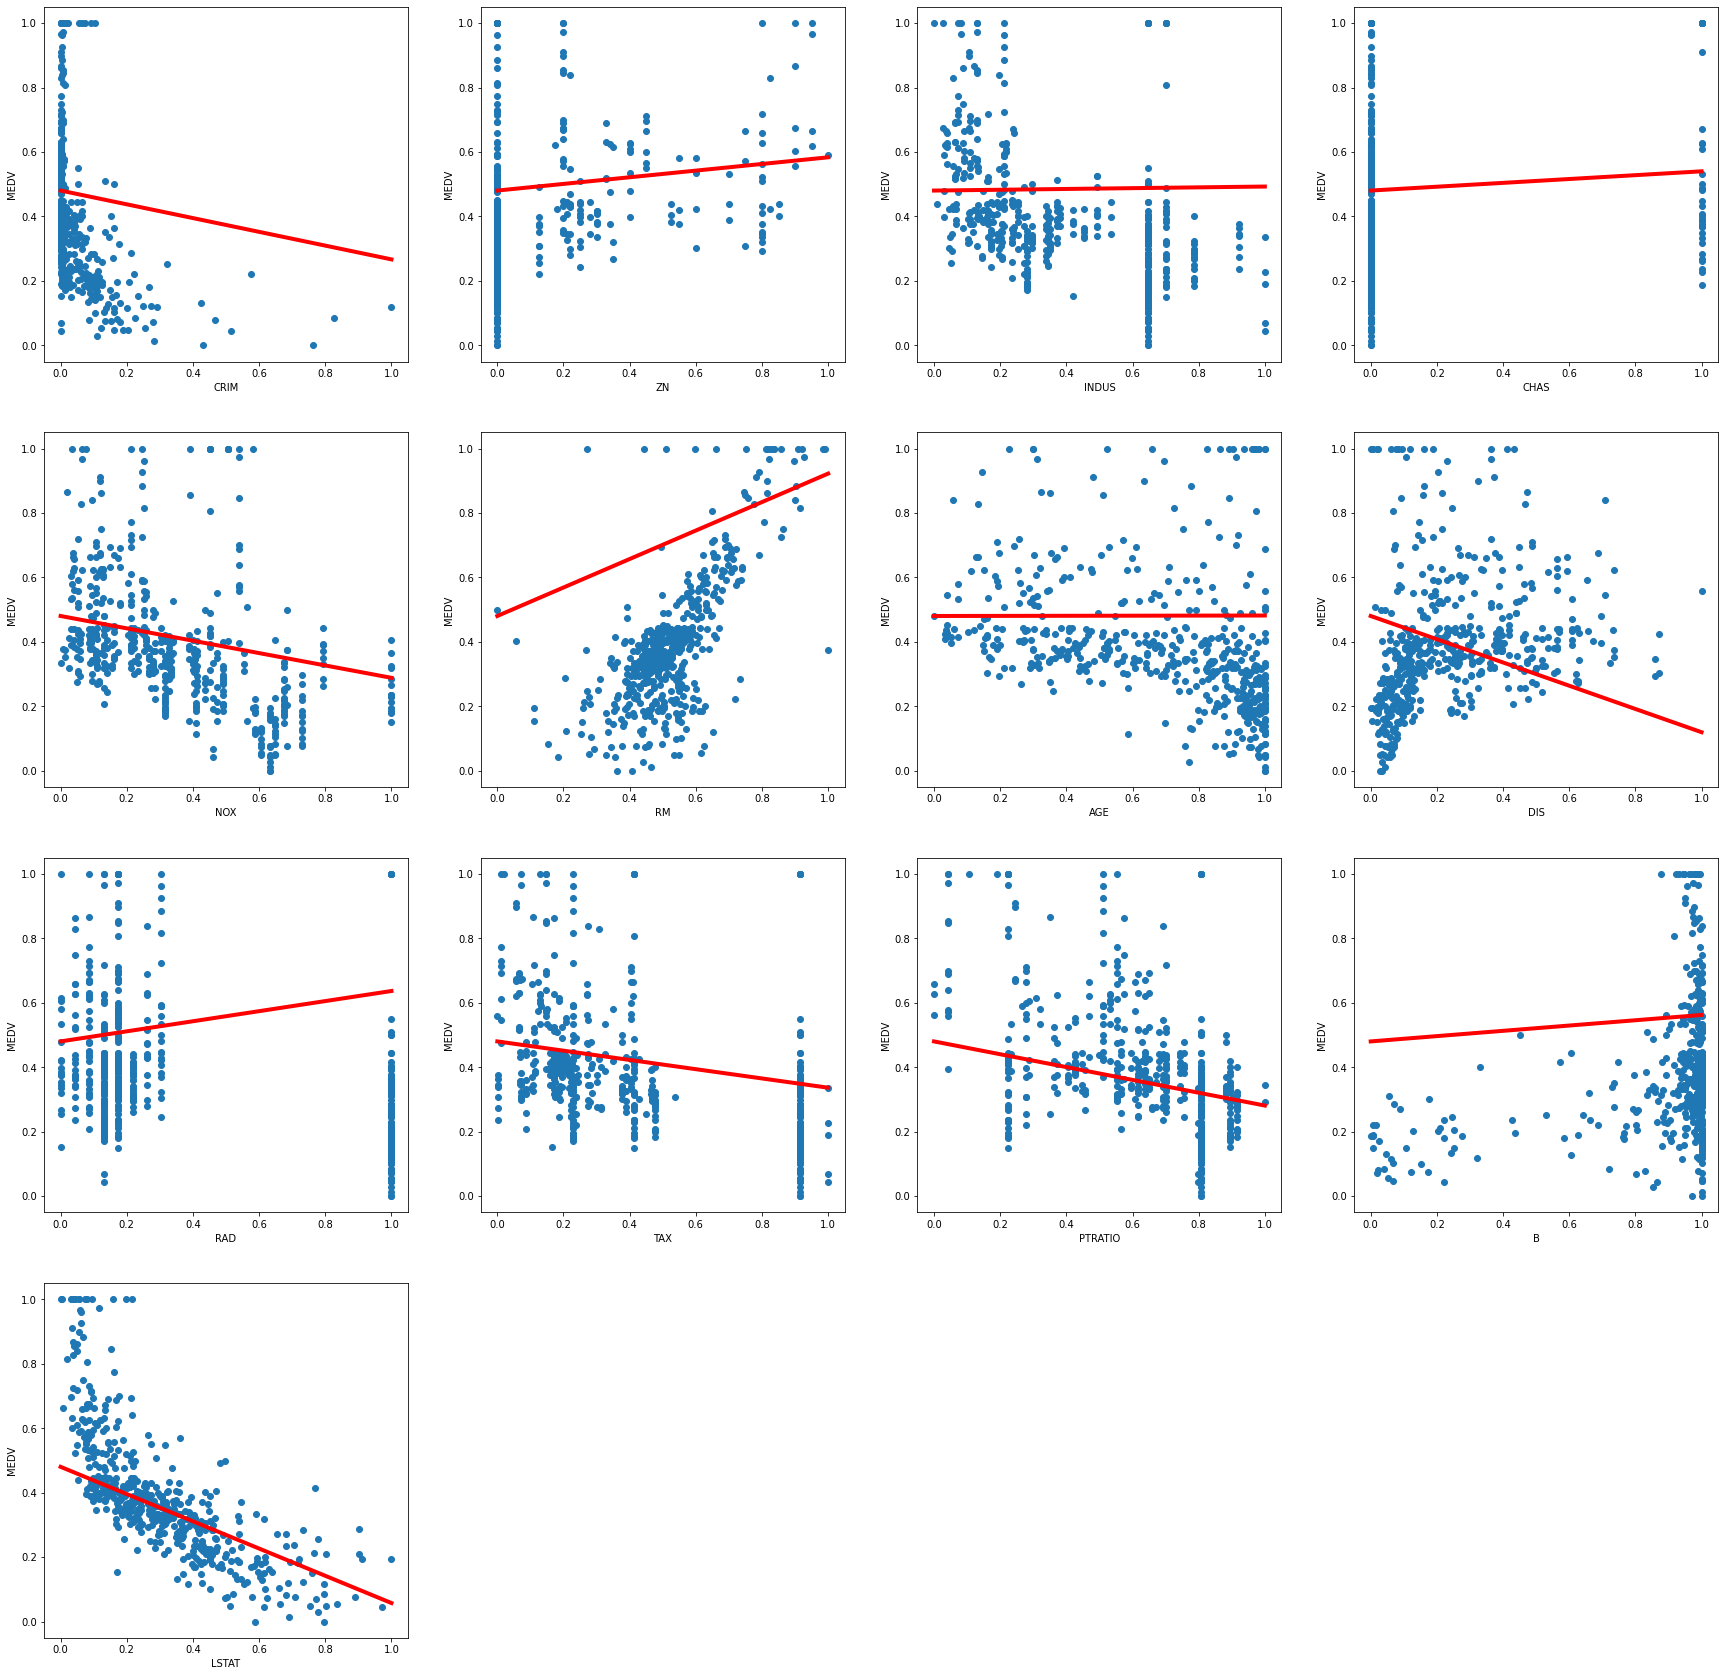

In [202]:
visualize(weight_closed_form, X, y, features)


## Analysis and discussion (20 points)

Your answer must include.....

- Qualitative and quantitative comparisons for the results obtained from gradient descent and closed-form solution
- Qualitative results for
    - the number of features
    - influence of each feature on the prediction
- Effect of the normalization technique
    

For analysis and discussion, you can exploit all functions you've write or make your own functions (or scripts).

An example code to analyze an effect for the number of features is as follows:

In [203]:
X, y = dataset.parse_data(features=['NOX', 'LSTAT'])
print(f"shape of X: {X.shape}, shape of y: {y.shape}")

model = LinearRegressor(lr= , tau= , dim=X.shape[1])

SyntaxError: invalid syntax (<ipython-input-203-4b6a24a62ebb>, line 4)